In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def segment_skin_hsv_robust(image_path):

    original_image = cv2.imread(image_path)
    if original_image is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    h, s, v = cv2.split(hsv_image)

    v_equalized = cv2.equalizeHist(v)

    hsv_equalized = cv2.merge([h, s, v_equalized])

    lower_skin = np.array([0, 48, 50], dtype=np.uint8)
    upper_skin = np.array([25, 255, 255], dtype=np.uint8)

    skin_mask = cv2.inRange(hsv_equalized, lower_skin, upper_skin)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

    segmented_skin_image = cv2.bitwise_and(original_image, original_image, mask=skin_mask)


    return original_image, skin_mask, segmented_skin_image

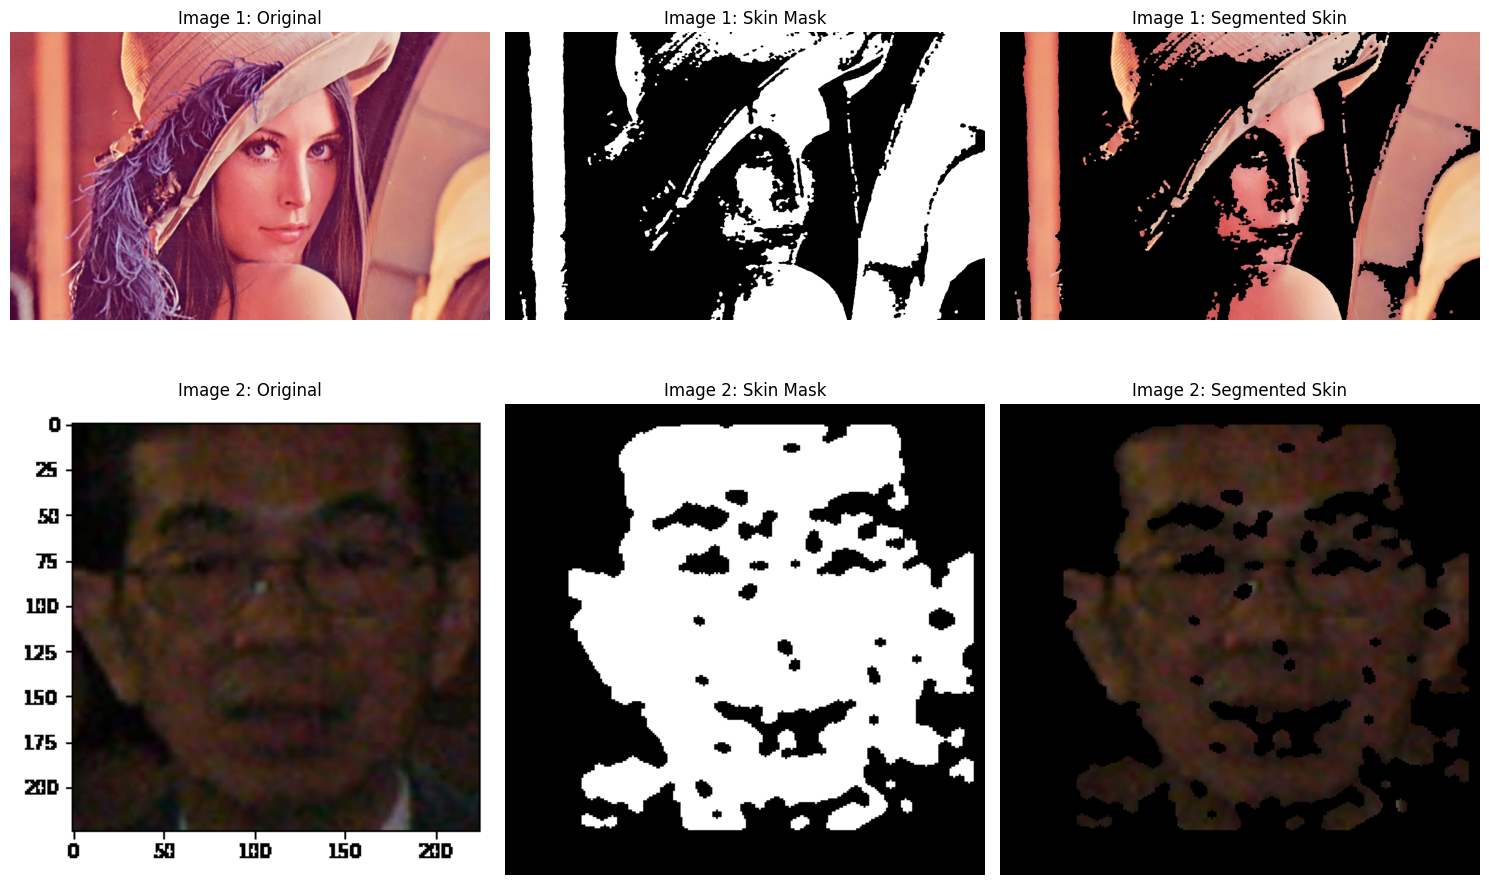

In [5]:
image_file = 'C:/Users/Lenovo/Desktop/lena.png'
image_file2 = 'C:/Users/Lenovo/Desktop/man1.png'

result_robust = segment_skin_hsv_robust(image_file)
result2 = segment_skin_hsv_robust(image_file2)

if result_robust and result2:
    original1, mask1, segmented1 = result_robust
    original2, mask2, segmented2 = result2

    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1) 
    plt.imshow(cv2.cvtColor(original1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1: Original')
    plt.axis('off')

    plt.subplot(2, 3, 2) 
    plt.imshow(mask1, cmap='gray')
    plt.title('Image 1: Skin Mask')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(segmented1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1: Segmented Skin')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(original2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2: Original')
    plt.axis('off')

    plt.subplot(2, 3, 5) 
    plt.imshow(mask2, cmap='gray')
    plt.title('Image 2: Skin Mask')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(segmented2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2: Segmented Skin')
    plt.axis('off')
    plt.tight_layout()
    plt.show()